In [2]:
import numpy as np
# L or U must be traingular
# L and U are nxn matrices, b is n vector
 
def forward(L,b):
    n = L.shape[0]
    x = np.zeros(n)
    x[0] = b[0]/L[0][0]
    for i in range(1,n):
        x[i] = b[i]
        for j in range(i):
            x[i] -= (L[i][j]*x[j])
        x[i] = x[i]/L[i][i]
    return x

def back(U,b):
    n = U.shape[0]
    x = np.zeros(n)
    if b.shape == (1,n):
        b = b.T
    x[n-1] = b[n-1]/U[n-1][n-1]
    for i in range(n-1,-1,-1):
        x[i] = b[i]
        for j in range(i+1,m):
            x[i] -= (U[i][j]*x[j])
        x[i] = x[i]/U[i][i]
    return x

In [1]:
def cholesky(A, dhalf = False):
    """A is a symmetric nxn matrix,
       returns lower triangular nxn L 
       and diagonal nxn D""" 
    n = A.shape[0]
    L = np.zeros((n,n))
    D = np.zeros((n,n))
    if dhalf:
        D2 = np.zeros((n,n))
    for i in range(n):
        D[i][i] = A[i][i]
        if dhalf:
            D2[i][i] = np.sqrt(A[i][i])
        L.T[i] = A.T[i] / A[i][i]
        A = A - D[i][i]*np.outer(L.T[i],L.T[i])
    if dhalf:
        return (L,D,D2)
    else:
        return(L,D)
    
def QR(A):
    """For square matrix A"""
    n,m = A.shape
    if n > m:
        A = A.T
    n = A.shape[0]
    Q = np.zeros((n,m))
    R = np.zeros((n,m))
    for k in range(n):
        w = A.T[k]
        for i in range(k):
            w = w - np.inner(Q.T[i],A.T[k])*Q.T[i]
            R[i][k] = np.inner(Q.T[i],A.T[k])
        R[k][k] = np.sqrt(np.inner(w,w))
        Q.T[k] = w / R[k][k]

    return (Q,R)

In [3]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
#from substitution import back
#from factorize import QR, cholesky

N = 30

start = -2
stop = 2
noise = 1

x = np.linspace(start,stop,N)

##### Find y-values for both datasets
n = x.shape[0]
y1 = np.zeros(n)
y2 = np.zeros(n)
for i in range(n):
    r = random() * noise
    y1[i] = x[i] * (np.cos(r + 0.5*x[i]**3) + np.sin(0.5*x[i]**3))
    y2[i] = 4*x[i]**5 - 5*x[i]**4 - 20*x[i]**3 + 10*x[i]**2 + 40*x[i] + 10 + r

1602461.77245
2.56788375911e+12


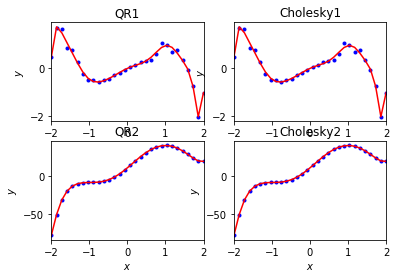

In [49]:
import time

m = 15
A = np.array([x**i for i in range(m)]).T
print(np.linalg.cond(A))
print(np.linalg.cond(A.T @ A))
#print(np.log(np.linalg.cond(np.linalg.inv(A.T @ A))))
B = A.T@A
Ab1 = A.T@y1
Ab2 = A.T@y2


# CHOLESKY
def least_cholesky(B,Ab):
    """
    (A.T@A)x = A.T@b
      =>  Bx = y
  => R.T@R@x = y
    => R.T@w = y
     where w = R@x
     
     R   - upper triangular
     R.T - lower triangular 
    """
    L,D,D2 = cholesky(B,True)
    R = L@D2
    w = forward(R,Ab)
    x = back(R.T,w)
    
    return x

    
# QR
def least_qr(A,b):
    """
    R = [R1,0].T
    Q.T@y = [c1,c2].T
    R1x = c1
    """
    Q,R = np.linalg.qr(A,mode='reduced')
    #Qm,Rm = QR(A)
    #print(Q.shape)
    #print(Qm.shape)
    R1 = R[:m]
    Qb = Q.T @ b
    Q1 = Qb[:m]
    x = back(R1,Q1)
    
    return x
    
# QR
a = time.time()
xhat1 = least_qr(A,y1)
yp1 = A.dot(xhat1)
b = time.time()
#print(b-a)
a = time.time()
xhat2 = least_qr(A,y2)
yp2 = A.dot(xhat2)
b = time.time()
#print(b-a)

# Cholesky
a = time.time()
xhat3 = least_cholesky(B,Ab1)
yp3 = A.dot(xhat3)
b = time.time()
#print(b-a)
a = time.time()
xhat4 = least_cholesky(B,Ab2)
yp4 = A.dot(xhat4)
b = time.time()
#print(b-a)


plt.subplot(221)
plt.plot(x,y1, 'b.')
plt.plot(x,yp1, 'r-')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'QR1')
plt.xlim(-2,2)

plt.subplot(222)
plt.plot(x,y1, 'b.')
plt.plot(x,yp3, 'r-')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Cholesky1')
plt.xlim(-2,2)

plt.subplot(223)
plt.plot(x,y2, 'b.')
plt.plot(x,yp2, 'r-')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'QR2')
plt.xlim(-2,2)

plt.subplot(224)
plt.plot(x,y2, 'b.')
plt.plot(x,yp4, 'r-')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Cholesky2')
plt.xlim(-2,2)

#plt.ylim(-100,100)
plt.show()

#print(sum(abs(yp2-yp4)))

In [50]:
#### ERROR
print('Relative error:')
#QR1
err_q1 = np.sum(np.abs((y1-yp1)/y1))/n

#QR2
err_q2 = np.sum(np.abs((y2-yp2)/y2))/n

#Cholesky1
err_c1 = np.sum(np.abs((y1-yp3)/y1))/n

#cholesky2
err_c2 = np.sum(np.abs((y2-yp4)/y2))/n

print('QR1:       ',err_q1)#, int(err_q1 - err_c1 + 1))
print('QR2:       ',err_q2)#, int(err_q2 - err_c2 + 1))
print('Cholesky1: ',err_c1)#, int(err_c1 - err_q1 + 1))
print('Cholesky2: ',err_c2)#, int(err_c2 - err_q2 + 1))

print('qr1: ', np.sum(((yp1-y1)**2)/n))
print('qr2: ', np.sum(((yp2-y2)**2)/n))
print('cho1: ', np.sum(((yp3-y1)**2)/n))
print('cho2: ', np.sum(((yp4-y2)**2)/n))

print(np.sum(((yp1-y1)**2)/n) - np.sum(((yp3-y1)**2)/n))


Relative error:
QR1:        0.123136287575
QR2:        0.0129015887957
Cholesky1:  0.123136287549
Cholesky2:  0.0129015887903
qr1:  0.00790147311977
qr2:  0.0203267954623
cho1:  0.00790147311977
cho2:  0.0203267954623
-1.38777878078e-17
